In [19]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

## Problem 1

#### (a)

We plot the entropy of length $N$ sequences $H(X_1, \dots, X_N)$ from the source.

N=1:5, [1.9745069489027967, 1.9590429154676035, 1.9508013221506304, 1.9447788910837143, 1.9375541100075002]


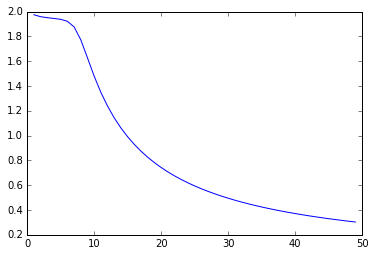

In [20]:
with open('hw5/sequence.txt', 'r') as f:
    src = f.read().strip()
M = len(src)
from collections import Counter
HN = []
for N in xrange(1, 50):
    seq_list = [src[i:(i+N)] for i in xrange(M-N+1)]
    seq_cnts = Counter(seq_list)
    p = np.array(seq_cnts.values(), dtype='float')
    p /= M - N + 1
    ent = 1. / N * (-np.sum(p*np.log2(p)))
    HN.append(ent)
_ = plt.plot(xrange(1, 50), HN)
print 'N=1:5,', HN[:5]

We can see that the estimated entropy converges to around 1.94 before the estimation goes inaccurate.

#### (b)

##### Huffman

In [21]:
letter_cnt = Counter(list(src))
print letter_cnt
for k, v in letter_cnt.iteritems():
    print '%s: %.2f' % (k, v * 1. / len(src))

Counter({'t': 9143, 'a': 8481, 'g': 6187, 'c': 5940})
a: 0.29
c: 0.20
t: 0.31
g: 0.21


In [22]:
codes = {'a': '10', 't': '11', 'c': '01', 'g': '00'}
out_huffman = ''.join(map(lambda x: codes[x], src))
# print out_huffman

##### Arithmetic
We use the laplace model here.
$$
p(a|x_1, \dots, x_{n-1}) = \frac{F_a + 1}{\sum_{a'}(F_{a'} + 1)}
$$

In [26]:
from collections import defaultdict
import decimal
from decimal import Decimal
decimal.getcontext().prec=100

u = Decimal(0.)
v = Decimal(1.)
p = v - u
index = {'a': 1, 'c': 2, 't': 3, 'g': 4}
cnt = np.array([0, 1, 1, 1, 1], dtype='float')
f = cnt / cnt.sum()
N = len(src)
for i, s in enumerate(src):
    qn = Decimal(f[:(index[s])].sum())
    rn = Decimal(f[:(index[s] + 1)].sum())
    v = u + p*rn
    u = u + p*qn
    cnt[index[s]] += 1
    f = cnt / cnt.sum()
    p = v - u
# print u
# print v